# Solar PV Simulation Workflow

In [4]:
# import reskit as rk
import pandas as pd
import numpy as np

## CSP

In [2]:
# Make a placements dataframe
placements1 = pd.DataFrame()
placements1["lon"] = [
    13.41,
]  # Longitude
placements1["lat"] = [
    52.51,
]  # Latitude
placements1["tilt"] = [
    32,
]  # System tilt in degrees
placements1["azimuth"] = [
    180,
]  # System azimuth in degrees
placements1["capacity"] = [
    2000,
]  # Total system capacity in kW
placements1["elev"] = [
    250,
]  # Altitute in meters
placements1["Area"] = [100]  # Park size in m**2

placements2 = pd.DataFrame()
placements2["lon"] = [
    6.083,
]  # Longitude
placements2["lat"] = [
    50.775,
]  # Latitude
placements2["tilt"] = [
    32,
]  # System tilt in degrees
placements2["azimuth"] = [
    180,
]  # System azimuth in degrees
placements2["capacity"] = [
    2000,
]  # Total system capacity in kW
placements2["elev"] = [
    250,
]  # Altitute in meters
placements2["Area"] = [200]  # Park size in m**2

placements3 = pd.DataFrame()
placements3["lon"] = [
    6.083,
]  # Longitude
placements3["lat"] = [
    50.775,
]  # Latitude
placements3["tilt"] = [
    32,
]  # System tilt in degrees
placements3["azimuth"] = [
    180,
]  # System azimuth in degrees
placements3["capacity"] = [
    2000,
]  # Total system capacity in kW
placements3["elev"] = [
    250,
]  # Altitute in meters
placements3["Area"] = [200]  # Park size in m**2

placements = placements1.append(placements2).append(placements3)
placements

,lon,lat,tilt,azimuth,capacity,elev,Area
0,13.410,52.510,32,180,2000,250,100
0,6.083,50.775,32,180,2000,250,200
0,6.083,50.775,32,180,2000,250,200


In [3]:
out = rk.solar.workflows.workflows.csp_test_franzmann(
    placements=placements, era5_path=r"C:\Users\d.franzmann\Desktop\Temp\Tiles"
)

c:\users\d.franzmann\code\reskit\reskit\solar\workflows\csp_workflow_manager.py:298: RuntimeWarning: divide by zero encountered in true_divide
  _IAM = 1 + a1 * np.power(_theta, 1) / self.sim_data['costheta'] \
c:\users\d.franzmann\code\reskit\reskit\solar\workflows\csp_workflow_manager.py:299: RuntimeWarning: divide by zero encountered in true_divide
  + a2 * np.power(_theta, 2) / self.sim_data['costheta'] \
c:\users\d.franzmann\code\reskit\reskit\solar\workflows\csp_workflow_manager.py:300: RuntimeWarning: invalid value encountered in true_divide
  + a3 * np.power(_theta, 3) / self.sim_data['costheta']


In [4]:
out.sim_data.keys()

odict_keys(['direct_horizontal_irradiance', 'hour_angle_degree', 'declination_angle_degree', 'solar_zenith', 'solar_altitude_angle_degree', 'costheta', 'IAM', 'eta_shdw', 'HeattoHFT_W', 'HeattoPlant_W'])

In [76]:
df = pd.DataFrame(out.sim_data["direct_horizontal_irradiance"])
df["time"] = pd.DataFrame(out.time_index)
day = 4
df.iloc[day * 24 : (day + 1) * 24 + 1]

,0,1,2,time
96,0.000000,0.000000,0.000000,2015-01-05 00:30:00
97,0.000000,0.000000,0.000000,2015-01-05 01:30:00
98,0.000000,0.000000,0.000000,2015-01-05 02:30:00
99,0.000000,0.000000,0.000000,2015-01-05 03:30:00
100,0.000000,0.000000,0.000000,2015-01-05 04:30:00
101,0.000000,0.000000,0.000000,2015-01-05 05:30:00
102,0.000000,0.000000,0.000000,2015-01-05 06:30:00
103,0.000000,0.000000,0.000000,2015-01-05 07:30:00
104,0.055544,0.254134,0.254134,2015-01-05 08:30:00
105,0.000000,25.246870,25.246870,2015-01-05 09:30:00


<ipython-input-74-b73f1a05e5e6>:9: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(out.sim_data['HeattoPlant_W'][day*24:(day+1)*24,0] / out.sim_data['direct_horizontal_irradiance'][day*24:(day+1)*24,0] / 909060, '--')
<ipython-input-74-b73f1a05e5e6>:9: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(out.sim_data['HeattoPlant_W'][day*24:(day+1)*24,0] / out.sim_data['direct_horizontal_irradiance'][day*24:(day+1)*24,0] / 909060, '--')


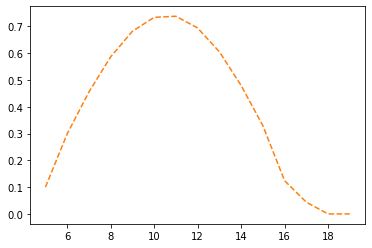

In [74]:
import matplotlib.pyplot as plt

%matplotlib inline


figure = plt.subplots()

for day in [4, 110]:
    # plt.plot(out.sim_data['direct_horizontal_irradiance'][day*24:(day+1)*24,0] / 140)
    plt.plot(
        out.sim_data["HeattoPlant_W"][day * 24 : (day + 1) * 24, 0]
        / out.sim_data["direct_horizontal_irradiance"][day * 24 : (day + 1) * 24, 0]
        / 909060,
        "--",
    )
    # plt.plot(out.sim_data['costheta'][day*24:(day+1)*24,0], '-.')

In [18]:
df_cos = pd.DataFrame(arr)
df_cos["time"] = pd.DataFrame(out.time_index)
day = 0
df_cos.iloc[day * 24 : (day + 1) * 24 + 1]

,lat,time
0,0.000000,2015-01-01 00:30:00
0,0.000000,2015-01-01 00:30:00
0,0.000000,2015-01-01 00:30:00
0,0.000000,2015-01-01 00:30:00
0,0.000000,2015-01-01 00:30:00
0,0.000000,2015-01-01 00:30:00
0,0.000000,2015-01-01 00:30:00
0,0.656738,2015-01-01 00:30:00
0,0.806057,2015-01-01 00:30:00
0,0.921142,2015-01-01 00:30:00


In [20]:
# check cos theta calculations:
_declination = np.deg2rad(out.sim_data["declination_angle_degree"][:, 0])  # -23.011637)
_hour_angle = np.deg2rad(out.sim_data["hour_angle_degree"][:, 0])  # -160.016295)
_solar_altitude = np.deg2rad(out.sim_data["solar_altitude_angle_degree"][:, 0])
_latitude = np.deg2rad(52.510)

Sz = np.cos(_latitude) * np.cos(_declination) * np.cos(_hour_angle) + np.sin(
    _latitude
) * np.sin(_declination)
Sy = np.cos(_latitude) * np.sin(_declination) - np.sin(_latitude) * np.cos(
    _declination
) * np.cos(_hour_angle)

costheta = (1 - (Sz / np.sqrt(np.square(Sy) + np.square(Sz)))) * (_solar_altitude > 0)
df_frac = pd.DataFrame(costheta)
df_frac["time"] = pd.DataFrame(out.time_index)

day = 0
df_frac.iloc[day * 24 : (day + 1) * 24 + 1]

,0,time
0,0.000000,2015-01-01 00:30:00
1,0.000000,2015-01-01 01:30:00
2,0.000000,2015-01-01 02:30:00
3,0.000000,2015-01-01 03:30:00
4,0.000000,2015-01-01 04:30:00
5,0.000000,2015-01-01 05:30:00
6,0.000000,2015-01-01 06:30:00
7,0.983243,2015-01-01 07:30:00
8,0.852551,2015-01-01 08:30:00
9,0.785634,2015-01-01 09:30:00


In [10]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = 1
a == b

array([[ True, False, False],
       [False, False, False]])

---
## Single Location

In [ ]:
placements = pd.DataFrame()
placements["lon"] = [
    6.083,
]  # Longitude
placements["lat"] = [
    50.775,
]  # Latitude
placements["tilt"] = [
    32,
]  # System tilt in degrees
placements["azimuth"] = [
    180,
]  # System azimuth in degrees
placements["capacity"] = [
    2000,
]  # Total system capacity in kW
placements["elev"] = [
    250,
]  # Altitute in meters
placements["Area"] = [100]  # Park size in m**2

In [ ]:
out = rk.solar.openfield_pv_sarah_unvalidated(
    placements=placements,
    sarah_path=rk.TEST_DATA["sarah-like"],
    era5_path=rk.TEST_DATA["era5-like"],
    module="WINAICO WSx-240P6",  # Module to use for simulation
)

print("Output is of type:", type(out))
print("Variables in output:")
for i, var in enumerate(list(out.variables)):
    print(
        " {i:2d}: {name:30s} - Dimensions:{dim}".format(
            i=i, name=var, dim=out[var].dims
        )
    )

In [ ]:
out

In [ ]:
out.capacity_factor.plot()

---
# Simulate single location, but only using ERA-5

In [ ]:
out = rk.solar.openfield_pv_era5_unvalidated(
    placements=placements,
    era5_path=rk.TEST_DATA["era5-like"],
    global_solar_atlas_ghi_path=rk.TEST_DATA["gsa-ghi-like.tif"],
    global_solar_atlas_dni_path=rk.TEST_DATA["gsa-dni-like.tif"],
    module="WINAICO WSx-240P6",  # Module to use for simulation
)

print("Output is of type:", type(out))
print("Variables in output:")
for i, var in enumerate(list(out.variables)):
    print(
        " {i:2d}: {name:30s} - Dimensions:{dim}".format(
            i=i, name=var, dim=out[var].dims
        )
    )

In [ ]:
out.capacity_factor.fillna(0).plot()

---
## Single Location with Tracking

In [ ]:
out = rk.solar.openfield_pv_era5_unvalidated(
    placements=placements,
    era5_path=rk.TEST_DATA["era5-like"],
    global_solar_atlas_ghi_path=rk.TEST_DATA["gsa-ghi-like.tif"],
    global_solar_atlas_dni_path=rk.TEST_DATA["gsa-dni-like.tif"],
    module="WINAICO WSx-240P6",  # Module to use for simulation
    tracking="single_axis",
)

In [ ]:
out.capacity_factor.fillna(0).plot()

---
## Simulating multiple locations is the same as simulating a single location
- It is recommended to simulate multiple locations at once!

In [ ]:
# Make a placements dataframe
placements = pd.DataFrame()
placements["lon"] = [
    6.083,
    6.090,
    6.095,
    6.100,
    6.105,
]  # Longitude
placements["lat"] = [
    50.775,
    50.780,
    50.785,
    50.790,
    50.795,
]  # Latitude
placements["tilt"] = [
    32,
    25,
    20,
    35,
    40,
]  # System tilt in degrees
placements["azimuth"] = [
    180,
    180,
    180,
    180,
    180,
]  # System azimuth in degrees
placements["capacity"] = [
    2000,
    2000,
    2000,
    2000,
    2000,
]  # Total system capacity in kW
placements["elev"] = [
    250,
    300,
    350,
    1000,
    -100,
]  # Altitute in meters

placements

In [ ]:
# Do simulation
out = rk.solar.openfield_pv_era5_unvalidated(
    placements=placements,
    era5_path=rk.TEST_DATA["era5-like"],
    global_solar_atlas_ghi_path=rk.TEST_DATA["gsa-ghi-like.tif"],
    global_solar_atlas_dni_path=rk.TEST_DATA["gsa-dni-like.tif"],
    module="WINAICO WSx-240P6",  # Module to use for simulation
)

In [ ]:
plt.figure(figsize=(6, 4))
for i in range(placements.shape[0]):
    out.capacity_factor[:, i].fillna(0).plot(label=i)

plt.legend(ncol=3, title="Placement ID")
plt.title("Capacity Factor Generation")
plt.show()